REGRESSÃO LINEAR - PARA PRECIFICADOR DE IMÓVEIS

Um dos modelos que será usado para o projeto de precificação de imóveis será o Modelo de Regressão Linear.

A regressão linear múltipla é uma técnica estatística usada para prever valores numéricos contínuos, portanto, esse modelo encontra a relação entre as variáveis dependentes (Y/Valor) e independente (X/características) do nosso conjunto de dados de imóveis.

Mais precisamente, utilizaremos será feito uma Regressão Linear Múltipla, pois precismaos encontrar entre as variáveis independentes (X1, X2, ...,Xn (Características)) e a variável dependente (Y/Valor).

Portanto, em comparação com a regressão linear simples, que envolve apenas uma variável independente, a regressão linear múltipla permite modelar relações mais complexas, levando em consideração múltiplos fatores que podem influenciar a variável dependente.

A equação geral para a regressão linear múltipla é:

𝑌=𝛽0+𝛽1𝑋1+𝛽2𝑋2+...+𝛽𝑛𝑋𝑛+𝜀Y=β0+β1X1+β2X2+...+βnXn+ε

Onde: 

•	Y é a variável dependente que estamos tentando prever.

•	𝑋1,𝑋2,...,𝑋𝑛X1,X2,...,Xn são as variáveis independentes.

•	𝛽0,𝛽1,𝛽2,...,𝛽𝑛β0,β1,β2,...,βn são os coeficientes que representam o efeito de cada variável independente na variável dependente.

•	ε é o erro aleatório.


Essencialmente, a regressão linear múltipla ajuda a entender como as mudanças nas variáveis independentes estão relacionadas às mudanças na variável dependente, controlando os efeitos de outras variáveis independentes no modelo.

In [112]:
## Importação das bibliotecas necessárias para o modelo

# Preparar dados
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder

# Métricas Regressão
import sklearn.metrics as sm
import numpy as np

import matplotlib.pyplot as plt

# Criar Modelos
from sklearn.linear_model import LinearRegression

In [113]:
# Dados Totais
df = pd.read_csv('https://raw.githubusercontent.com/JanotLucas/Projeto-Integrador-I/main/imoveis.csv')

Análise Descritiva dos dados de imóveis

Abaixo: Veremos a quantidade de registros/linhas do DataFrame completa dos imóveis

In [114]:
len(df)

49728

Abaixo: Verificaremos os 5 primeiros registros/linhas do DataFrame do total dos imóveis

In [115]:
df.head()

,Título,Valor,area,Valor_metro,quartos,suites,garagem,iptu,condominio,descricao,...,Salão Gourmet,Sauna,SPA,Área de Serviço Coberta,Piso em Porcelanato,Vista Livre,Home Theater,Aceita Pet,Academia,tipo
0,SCS Quadra 06 Bloco A Lote 194,7000.0,200.0,0.028571,0,0,0,SemInformacao,2000,"6º andar todo reformado, com 200 m², piso em p...",...,0,0,0,0,0,0,0,0,0,Prédio
1,SQNW 310 Bloco B,4900.0,76.0,0.015510,2,1,2,409,791,Excelente apartamento no condomínio Persona Ve...,...,0,1,0,0,0,0,0,0,0,Apartamento
2,COLONIA AGRICOLA SAMAMBAIA,9000.0,765.0,0.085000,5,3,21,SemInformacao,SemInformacao,"Colônia Agrícola - Sobrado com 5 dormitórios, ...",...,0,1,0,0,0,0,0,0,0,Casa
3,SBS Quadra 02 Bloco S Lote 01,700.0,28.0,0.040000,0,0,0,257,562,"Excelente sala comercial com piso laminado, ar...",...,0,0,0,0,0,0,0,0,0,Sala
4,Condomínio Prive Morada Sul,7950.0,500.0,0.062893,5,3,4,SemInformacao,849,Sem dúvida esta é uma daquelas oportunidades q...,...,0,0,0,0,0,0,0,0,0,Casa


Abaixo: Usaremos a função 'info()' para exibir informações gerais sobre o DataFrame

In [116]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49728 entries, 0 to 49727
Data columns (total 57 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Título                   49728 non-null  object 
 1   Valor                    49722 non-null  float64
 2   area                     49728 non-null  float64
 3   Valor_metro              49707 non-null  float64
 4   quartos                  49728 non-null  int64  
 5   suites                   49728 non-null  int64  
 6   garagem                  49728 non-null  int64  
 7   iptu                     49728 non-null  object 
 8   condominio               49728 non-null  object 
 9   descricao                49728 non-null  object 
 10  regiao                   49728 non-null  object 
 11  cidade                   49728 non-null  object 
 12  imobiliaria              49728 non-null  object 
 13  creci                    49728 non-null  object 
 14  operacao              

In [117]:
# Exibe a porcentagem de valores núlos por coluna
df.isna().sum() * 100 / len(df)

Título                     0.000000
Valor                      0.012066
area                       0.000000
Valor_metro                0.042230
quartos                    0.000000
suites                     0.000000
garagem                    0.000000
iptu                       0.000000
condominio                 0.000000
descricao                  0.000000
regiao                     0.000000
cidade                     0.000000
imobiliaria                0.000000
creci                      0.000000
operacao                   0.000000
Aquecimento Solar          0.000000
Circuito de TV             0.000000
Gerador de Energia         0.000000
Piscina                    0.000000
Sala de Ginástica          0.000000
Varanda                    0.000000
Cozinha Espaçosa           0.000000
Ar Condicionado            0.000000
Cobertura Coletiva         0.000000
Guarita                    0.000000
PlayGround                 0.000000
Salão de Festas            0.000000
Projeto de Iluminação      0

A análise dos dados exibe apenas uma porcentagem de valores nulos nas colunas 'Valor' e na coluna 'Valor_metro'

Verificando a quantidades de cada valores na coluna 'iptu'. Sendo constatada um grande quantidade de regustros Sem Informação 

In [118]:
df['iptu'].value_counts()

SemInformacao    35291
1200               246
800                215
1000               212
0                  197
1500               174
600                169
500                149
700                141
980                128
900                124
1900               110
2000               109
300                 97
400                 97
1100                93
1800                92
2500                79
200                 78
1300                76
100                 73
650                 68
1                   66
1600                65
850                 63
1400                59
1700                59
250                 59
150                 56
750                 56
120                 55
3000                54
450                 52
350                 49
890                 36
780                 34
130                 32
135                 32
2300                31
2200                31
550                 31
4000                31
950                 30
140        

No código abaixo, substituímos os valores "SemInformacao" na coluna de IPTU da base de dados de imóveis pela mediana do IPTU correspondente ao tipo e região do imóvel.

Passos realizados:

1) Filtragem dos Valores Numéricos: Primeiramente, criamos um novo DataFrame contendo apenas os registros com valores numéricos de IPTU. Isso nos permite calcular as medianas corretas.

2) Cálculo das Medianas: Agrupamos os dados numéricos por tipo e região do imóvel e calculamos a mediana do IPTU para cada grupo. Este passo gera um DataFrame com as medianas calculadas.

3) Criação de um Dicionário para Mapeamento: Convertimos o DataFrame de medianas em um dicionário, onde as chaves são combinações de tipo e região, e os valores são as medianas correspondentes. Isso facilita a busca rápida das medianas durante a substituição.

4) Substituição dos Valores "SemInformacao": Definimos uma função que verifica se o valor do IPTU é "SemInformacao". Se for, a função substitui esse valor pela mediana apropriada do dicionário. Aplicamos essa função a cada linha do DataFrame original.

O objetivo principal desse código é limpar e enriquecer a base de dados de imóveis, substituindo informações faltantes de IPTU por valores estatisticamente relevantes. Isso permite uma análise mais precisa e consistente dos dados, tornando-os mais adequados para análises e modelagem estatística, sendo essencial para o desenvolvimento de um precificador de imóveis que depende de dados completos e confiáveis.

In [119]:
# Convertendo os valores numéricos para inteiros
df_numerico = df[df['iptu'] != 'SemInformacao']
df_numerico['iptu'] = pd.to_numeric(df_numerico['iptu'])

# Calculando a mediana do IPTU por tipo e região
medianas = df_numerico.groupby(['tipo', 'regiao'])['iptu'].median().reset_index()
medianas.columns = ['tipo', 'regiao', 'mediana_iptu']

# Criando um dicionário para mapeamento
medianas_dict = medianas.set_index(['tipo', 'regiao'])['mediana_iptu'].to_dict()

# Função para substituir 'SemInformacao' pela mediana correspondente
def substituir_por_mediana(row):
    if row['iptu'] == 'SemInformacao':
        return medianas_dict.get((row['tipo'], row['regiao']), row['iptu'])
    return row['iptu']

# Aplicando a função ao DataFrame
df['iptu'] = df.apply(substituir_por_mediana, axis=1)

# Verificando o resultado
print(df['iptu'].value_counts())

C:\Users\mateu\AppData\Local\Temp\ipykernel_8908\642570541.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_numerico['iptu'] = pd.to_numeric(df_numerico['iptu'])


1000.0           2494
889.0            1948
900.0            1759
905.5            1735
SemInformacao    1434
1600.0           1187
750.0            1132
1200.0           1025
2149.5            982
990.0             810
2920.0            733
700.0             692
2000.0            612
1019.0            606
800.0             585
1108.5            551
1381.5            546
1034.0            531
500.0             527
365.0             517
3189.0            505
424.0             484
300.0             371
748.5             360
433.0             340
597.0             337
913.0             328
703.0             311
418.0             309
871.0             294
1363.0            291
1564.0            289
410.0             281
600.0             268
1033.5            259
1200              246
1100.0            240
800               215
1000              212
360.0             210
863.0             206
530.0             203
278.5             199
0                 197
60.5              180
400.0     

In [120]:
df['condominio'].value_counts()

SemInformacao    26838
200                604
250                551
500                536
450                512
300                506
400                479
150                458
600                440
350                437
550                346
100                290
0                  247
700                236
650                229
800                223
620                220
480                212
380                195
1000               184
180                172
1100               169
1200               163
750                153
330                151
420                150
280                148
900                145
320                142
360                140
430                139
460                136
580                128
50                 124
370                119
1500               115
1300               114
850                108
560                107
120                106
390                104
530                102
680                101
270        

Será feito o mesmo para a coluna de 'condominio'.

In [121]:
# Convertendo os valores numéricos para inteiros
df_numerico = df[df['condominio'] != 'SemInformacao']
df_numerico['condominio'] = pd.to_numeric(df_numerico['condominio'])

# Calculando a mediana do condominio por tipo e região
medianas = df_numerico.groupby(['tipo', 'regiao'])['condominio'].median().reset_index()
medianas.columns = ['tipo', 'regiao', 'mediana_condominio']

# Criando um dicionário para mapeamento
medianas_dict = medianas.set_index(['tipo', 'regiao'])['mediana_condominio'].to_dict()

# Função para substituir 'SemInformacao' pela mediana correspondente
def substituir_por_mediana(row):
    if row['condominio'] == 'SemInformacao':
        return medianas_dict.get((row['tipo'], row['regiao']), row['condominio'])
    return row['condominio']

# Aplicando a função ao DataFrame
df['condominio'] = df.apply(substituir_por_mediana, axis=1)

# Verificando o resultado
print(df['condominio'].value_counts())

C:\Users\mateu\AppData\Local\Temp\ipykernel_8908\4081947981.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_numerico['condominio'] = pd.to_numeric(df_numerico['condominio'])


SemInformacao    3370
150.0            1594
250.0            1583
100.0            1271
560.0            1110
623.0             981
0.0               937
200.0             843
650.0             813
550.0             812
702.0             756
350.0             720
1128.0            684
200               604
600.0             594
250               551
500               536
450               512
300               506
400               479
150               458
300.0             441
600               440
350               437
914.5             417
180.0             405
1.0               404
75.5              390
70.0              375
550               346
913.5             316
100               290
572.0             281
1067.0            267
554.0             258
1100.0            253
500.0             248
415.0             247
0                 247
390.0             237
700               236
650               229
800               223
620               220
618.5             218
460.0     

Verificando que não foi possível preencher todos os valores pela mediana, decidiu-se remover as linhas com valores 'semInformacao' em 'iptu' e 'condominio', pois é uma quantidade pequena de dados.

In [122]:
# Removendo linhas onde o valor de 'iptu' ou 'condominio' é 'SemInformacao'
df = df[(df['iptu'] != 'SemInformacao') & (df['condominio'] != 'SemInformacao')]

In [123]:
len(df)

46057

In [124]:
# Exibe a porcentagem de valores núlos por coluna
df.isna().sum() * 100 / len(df)

Título                     0.000000
Valor                      0.013027
area                       0.000000
Valor_metro                0.043424
quartos                    0.000000
suites                     0.000000
garagem                    0.000000
iptu                       0.000000
condominio                 0.000000
descricao                  0.000000
regiao                     0.000000
cidade                     0.000000
imobiliaria                0.000000
creci                      0.000000
operacao                   0.000000
Aquecimento Solar          0.000000
Circuito de TV             0.000000
Gerador de Energia         0.000000
Piscina                    0.000000
Sala de Ginástica          0.000000
Varanda                    0.000000
Cozinha Espaçosa           0.000000
Ar Condicionado            0.000000
Cobertura Coletiva         0.000000
Guarita                    0.000000
PlayGround                 0.000000
Salão de Festas            0.000000
Projeto de Iluminação      0

In [125]:
#Verificar quais são os nulos na coluna 'Valor'
valores_nulos = df['Valor'].isnull()

# Filtrando para mostrar apenas as linhas com valores nulos na coluna 'Valor'
nulos_na_coluna_valor = df[valores_nulos]
nulos_na_coluna_valor

,Título,Valor,area,Valor_metro,quartos,suites,garagem,iptu,condominio,descricao,...,Salão Gourmet,Sauna,SPA,Área de Serviço Coberta,Piso em Porcelanato,Vista Livre,Home Theater,Aceita Pet,Academia,tipo
1520,SCS Quadra 04 Bloco A Lote 219/237 - ED. VERA...,NaN,709.50,NaN,0,0,0,1034.0,572.0,Oportunidade única de pavimento corporativo em...,...,0,0,0,0,0,0,0,0,0,Sala
2205,SAUN Quadra 5 - EDIFÍCIO CNC,NaN,5439.00,NaN,0,0,112,4677.0,5999.0,Oportunidade única de pavimentos corporativos ...,...,0,0,0,0,0,0,0,0,0,Prédio
2468,SBN Quadra 2,NaN,492.80,NaN,0,0,9,1200.0,618.5,SNB Quadra 2 Bloco N - Asa Norte\r\rOportunida...,...,0,0,0,0,0,0,0,0,0,Sala
4629,SBN Quadra 01 Bloco B Lote 14 - EDIFICIO CNC,NaN,173.10,NaN,0,0,3,1200.0,618.5,\rOportunidade única de Sala Corporativa em ex...,...,0,0,0,0,0,0,0,0,0,Sala
4703,SBN Quadra 01 Bloco B Lote 14 - EDIFÍCIO CNC,NaN,133.60,NaN,0,0,2,1200.0,618.5,Oportunidade única de Sala Corporativa em exce...,...,0,0,0,0,0,0,0,0,0,Sala
6928,SBN Quadra 2 - Bloco E,NaN,6408.66,NaN,0,0,175,4677.0,5999.0,Oportunidade única de pavimentos corporativos ...,...,0,0,0,0,0,0,0,0,0,Prédio


Análise dos valores média e mediana dos valores dos imóveis

In [126]:
# Pegar a média dos valores por tipo de operação
valor_medio_por_tipo_operacao = df.groupby(['tipo', 'operacao'])['Valor'].mean()

# Formatar os valores para representar duas casas decimais e adiciona separadores de milhares
valor_medio_por_tipo_operacao_formatado = valor_medio_por_tipo_operacao.map('{:,.2f}'.format)

print(valor_medio_por_tipo_operacao_formatado)

tipo               operacao
Apartamento        aluguel         4,959.59
                   venda       1,124,624.80
Casa               aluguel        18,802.79
                   venda       2,443,287.22
Galpão             aluguel        19,788.80
                   venda       2,139,545.43
Garagem            aluguel           282.47
                   venda          45,422.75
Hotel              aluguel         4,498.53
                   venda         539,617.32
Kitnet             aluguel         1,307.43
                   venda         278,602.35
Loja               aluguel         8,896.67
                   venda         886,186.65
Lote/Terreno/Área  aluguel        49,628.76
                   venda       1,365,805.79
Loteamento         venda       1,544,294.12
Ponto              aluguel        37,508.06
                   venda         792,542.53
Prédio             aluguel       142,545.19
                   venda       4,105,682.48
Rural              aluguel        15,750.00
    

In [127]:
# Filtrar os dados para incluir apenas a região 'Asa Norte'
df_asa_norte = df[df['regiao'] == 'ASA NORTE']

# Calcular a média dos valores por tipo de operação para a região 'Asa Norte'
valor_medio_por_tipo_operacao_asa_norte = df_asa_norte.groupby(['tipo', 'operacao'])['Valor'].mean()

# Formatar os valores para representar duas casas decimais e adicionar separadores de milhares
valor_medio_por_tipo_operacao_asa_norte_formatado = valor_medio_por_tipo_operacao_asa_norte.map('{:,.2f}'.format)

print(valor_medio_por_tipo_operacao_asa_norte_formatado)

tipo         operacao
Apartamento  aluguel         16,984.06
             venda        1,223,794.08
Casa         aluguel          7,433.33
             venda        1,586,982.26
Galpão       aluguel         47,202.74
             venda        1,476,722.22
Garagem      aluguel            370.36
             venda           52,078.43
Hotel        aluguel          4,572.33
             venda          580,453.08
Kitnet       aluguel          1,329.85
             venda          248,725.77
Loja         aluguel         10,851.71
             venda          597,803.66
Ponto        aluguel         11,434.12
             venda          302,401.48
Prédio       aluguel        259,366.46
             venda       13,488,390.65
Sala         aluguel         11,086.53
             venda          754,664.84
Name: Valor, dtype: object


### OBS: Após a análise acima, vou substituir os valores nulos pela mediana, pois a média está discrepante.

In [128]:
# Calcular a mediana para cada combinação de tipo de imóvel e região
mediana_por_tipo_e_regiao = df.groupby(['tipo', 'regiao'])['Valor'].median()

# Substituir os valores nulos pela mediana correspondente de cada tipo de imóvel e região
for tipo, regiao in mediana_por_tipo_e_regiao.index:
    filtro = (df['tipo'] == tipo) & (df['regiao'] == regiao)
    mediana = mediana_por_tipo_e_regiao[(tipo, regiao)]
    df.loc[filtro, 'Valor'] = df.loc[filtro, 'Valor'].fillna(mediana)

Tratando os valores nulos na coluna 'Valor_metro'

In [129]:
#Verificar quais são os nulos na coluna 'Valor'
valores_metro_nulos = df['Valor_metro'].isnull()

# Filtrando para mostrar apenas as linhas com valores nulos na coluna 'Valor'
nulos_na_coluna_valor = df[valores_metro_nulos]
nulos_na_coluna_valor

,Título,Valor,area,Valor_metro,quartos,suites,garagem,iptu,condominio,descricao,...,Salão Gourmet,Sauna,SPA,Área de Serviço Coberta,Piso em Porcelanato,Vista Livre,Home Theater,Aceita Pet,Academia,tipo
1520,SCS Quadra 04 Bloco A Lote 219/237 - ED. VERA...,40000.0,709.50,NaN,0,0,0,1034.0,572.0,Oportunidade única de pavimento corporativo em...,...,0,0,0,0,0,0,0,0,0,Sala
2205,SAUN Quadra 5 - EDIFÍCIO CNC,845000.0,5439.00,NaN,0,0,112,4677.0,5999.0,Oportunidade única de pavimentos corporativos ...,...,0,0,0,0,0,0,0,0,0,Prédio
2468,SBN Quadra 2,42000.0,492.80,NaN,0,0,9,1200.0,618.5,SNB Quadra 2 Bloco N - Asa Norte\r\rOportunida...,...,0,0,0,0,0,0,0,0,0,Sala
4629,SBN Quadra 01 Bloco B Lote 14 - EDIFICIO CNC,42000.0,173.10,NaN,0,0,3,1200.0,618.5,\rOportunidade única de Sala Corporativa em ex...,...,0,0,0,0,0,0,0,0,0,Sala
4703,SBN Quadra 01 Bloco B Lote 14 - EDIFÍCIO CNC,42000.0,133.60,NaN,0,0,2,1200.0,618.5,Oportunidade única de Sala Corporativa em exce...,...,0,0,0,0,0,0,0,0,0,Sala
5412,SBN Quadra 01 Bloco B Lote 14 - EDIFICIO CNC,0.0,147.70,NaN,0,0,2,1200.0,618.5,Oportunidade única de Sala Corporativa em exce...,...,0,0,0,0,0,0,0,0,0,Sala
5753,SBN Quadra 01 Bloco B Lote 14,0.0,168.80,NaN,0,0,2,1200.0,618.5,Oportunidade única de Sala Corporativa em exce...,...,0,0,0,0,0,0,0,0,0,Sala
6928,SBN Quadra 2 - Bloco E,845000.0,6408.66,NaN,0,0,175,4677.0,5999.0,Oportunidade única de pavimentos corporativos ...,...,0,0,0,0,0,0,0,0,0,Prédio
49618,SQNW 307 Bloco J,0.0,74.00,NaN,2,1,2,2149.5,1128.0,OPORTUNIDADE! Ligue Agora\r\rSQNW 307 - NOROES...,...,0,1,0,0,0,1,0,0,0,Apartamento
49621,QI 33,0.0,258.00,NaN,4,4,3,700.0,554.0,COBERTURA LINEAR ESPETÁCULAR! Vista Maravilhos...,...,0,1,1,0,0,1,0,0,0,Apartamento


In [130]:
# Calcular a mediana para cada combinação de tipo de imóvel e região
mediana_por_tipo_e_regiao = df.groupby(['tipo', 'regiao'])['Valor_metro'].median()

# Substituir os valores nulos pela mediana correspondente de cada tipo de imóvel e região
for tipo, regiao in mediana_por_tipo_e_regiao.index:
    filtro = (df['tipo'] == tipo) & (df['regiao'] == regiao)
    mediana = mediana_por_tipo_e_regiao[(tipo, regiao)]
    df.loc[filtro, 'Valor_metro'] = df.loc[filtro, 'Valor_metro'].fillna(mediana)

In [131]:
# Exibe a porcentagem de valores núlos por coluna
df.isna().sum() * 100 / len(df)

Título                     0.0
Valor                      0.0
area                       0.0
Valor_metro                0.0
quartos                    0.0
suites                     0.0
garagem                    0.0
iptu                       0.0
condominio                 0.0
descricao                  0.0
regiao                     0.0
cidade                     0.0
imobiliaria                0.0
creci                      0.0
operacao                   0.0
Aquecimento Solar          0.0
Circuito de TV             0.0
Gerador de Energia         0.0
Piscina                    0.0
Sala de Ginástica          0.0
Varanda                    0.0
Cozinha Espaçosa           0.0
Ar Condicionado            0.0
Cobertura Coletiva         0.0
Guarita                    0.0
PlayGround                 0.0
Salão de Festas            0.0
Projeto de Iluminação      0.0
Pintura Nova               0.0
Área de Lazer              0.0
Interfone                  0.0
Mobiliado                  0.0
Área de 

In [132]:
# Resumo estatístico básico
resumo_df = df.describe()
resumo_df

,Valor,area,Valor_metro,quartos,suites,garagem,Aquecimento Solar,Circuito de TV,Gerador de Energia,Piscina,...,Salão de Jogos,Salão Gourmet,Sauna,SPA,Área de Serviço Coberta,Piso em Porcelanato,Vista Livre,Home Theater,Aceita Pet,Academia
count,4.605700e+04,4.605700e+04,46057.000000,46057.000000,46057.000000,46057.000000,46057.000000,46057.0,46057.000000,46057.000000,...,46057.000000,46057.000000,46057.000000,46057.000000,46057.000000,46057.000000,46057.000000,46057.000000,46057.0,46057.0
mean,1.455588e+06,1.063830e+03,0.007256,2.370715,1.271577,2.116725,0.055714,0.0,0.038865,0.291096,...,0.082441,0.005146,0.134268,0.036846,0.009944,0.011160,0.135115,0.031722,0.0,0.0
std,2.566299e+07,1.045044e+05,0.149572,1.825126,1.543568,7.883756,0.229370,0.0,0.193275,0.454273,...,0.275039,0.071550,0.340944,0.188385,0.099225,0.105051,0.341850,0.175260,0.0,0.0
min,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
25%,2.670000e+05,6.000000e+01,0.000123,1.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
50%,6.350000e+05,1.450000e+02,0.000218,3.000000,1.000000,1.000000,0.000000,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
75%,1.320000e+06,3.500000e+02,0.000568,4.000000,2.000000,3.000000,0.000000,0.0,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
max,3.200000e+09,2.200000e+07,25.000000,96.000000,96.000000,1000.000000,1.000000,0.0,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,0.0


Análise de gráficos de pizza para verificar a porcentagem de cada tipo de operação na base de dados

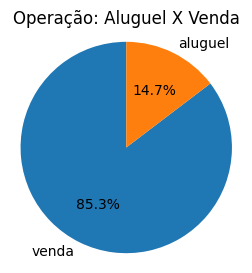

In [133]:
# Calcule as contagens de cada categoria
contagem_operacao = df['operacao'].value_counts()

# O gráfico de pizza de tipo do animal
plt.figure(figsize=(3, 3))
plt.pie(contagem_operacao, labels=contagem_operacao.index, autopct='%1.1f%%', startangle=90)
plt.title('Operação: Aluguel X Venda')
plt.axis('equal')
plt.show()

Analisando o gráfico de pizza é possível perceber que a base de dados está desbalanceado em relação ao tipo de operação imobiliária (Aluguel X Venda), isso pode afetar a precisão e a eficácia do seu modelo de precificação de imóveis.

Após a análise descritiva dos dados, será feito a separação da base de dados em imóveis que estão para venda e para aluguel, para assim, fazer o modelo de cada um.

Análise Descritiva dos dados de imóveis para a venda

In [134]:
#Base Venda
df_venda = df[df['operacao'] == 'venda']

In [135]:
df_venda.head()

,Título,Valor,area,Valor_metro,quartos,suites,garagem,iptu,condominio,descricao,...,Salão Gourmet,Sauna,SPA,Área de Serviço Coberta,Piso em Porcelanato,Vista Livre,Home Theater,Aceita Pet,Academia,tipo
7309,Alameda Beija flores,1650000.0,370.00,0.000224,4,4,2,1000.0,777,Mikonos House – No Residencial Santa Mônica - ...,...,0,1,1,0,0,1,0,0,0,Casa
7310,"RODOVIA BR 0020 KM 12,5",1240000.0,200.00,0.000161,3,3,2,1200.0,460.0,Imobiliária Margarete Corrêa vende Excelente C...,...,0,0,0,0,0,0,0,0,0,Casa
7311,SHCGN 713 Bloco Q,2490000.0,257.00,0.000103,4,3,2,2608,125.0,Kontá Imóveis: Perto de você!\r\rCasa construí...,...,0,0,0,0,0,0,0,0,0,Casa
7312,SQSW 100 Bloco B,1390000.0,97.22,0.000070,3,1,1,2564,1061,Kontá Imóveis: Perto de você!\r\rEXCLUSIVIDADE...,...,0,0,0,0,0,1,0,0,0,Apartamento
7313,SHIS QL 8,6900000.0,750.00,0.000109,5,5,4,2920.0,623.0,Piso inferior: Quatro espaçosas salas aguarda...,...,0,1,0,0,0,0,0,0,0,Casa


In [136]:
len(df_venda)

39309

In [137]:
df_venda.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39309 entries, 7309 to 49727
Data columns (total 57 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Título                   39309 non-null  object 
 1   Valor                    39309 non-null  float64
 2   area                     39309 non-null  float64
 3   Valor_metro              39309 non-null  float64
 4   quartos                  39309 non-null  int64  
 5   suites                   39309 non-null  int64  
 6   garagem                  39309 non-null  int64  
 7   iptu                     39309 non-null  object 
 8   condominio               39309 non-null  object 
 9   descricao                39309 non-null  object 
 10  regiao                   39309 non-null  object 
 11  cidade                   39309 non-null  object 
 12  imobiliaria              39309 non-null  object 
 13  creci                    39309 non-null  object 
 14  operacao           

Removendo as colunas que eu considero irrelevante para o modelo

In [138]:
df_venda = df_venda.drop(columns=['Título', 'descricao', 'cidade', 'imobiliaria', 'creci', 'operacao', 'Aquecimento Solar', 'Circuito de TV', 'Gerador de Energia', 'Cobertura Coletiva', 'Guarita', 'Interfone', 'Mobiliado', 'Despensa', 'Escritório', 'Gás Canalizado', 'Jardim', 'Lavabo', 'Lazer no Pilotis',  'Poço Artesiano', 'Portão Eletrônico', 'Quadra Esportiva', 'Sala de Jogos', 'Salão de Jogos', 'Salão Gourmet', 'Sauna', 'SPA', 'Área de Serviço Coberta', 'Piso em Porcelanato', 'Vista Livre', 'Home Theater', 'Aceita Pet' ])

In [139]:
df_venda.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39309 entries, 7309 to 49727
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Valor                  39309 non-null  float64
 1   area                   39309 non-null  float64
 2   Valor_metro            39309 non-null  float64
 3   quartos                39309 non-null  int64  
 4   suites                 39309 non-null  int64  
 5   garagem                39309 non-null  int64  
 6   iptu                   39309 non-null  object 
 7   condominio             39309 non-null  object 
 8   regiao                 39309 non-null  object 
 9   Piscina                39309 non-null  int64  
 10  Sala de Ginástica      39309 non-null  int64  
 11  Varanda                39309 non-null  int64  
 12  Cozinha Espaçosa       39309 non-null  int64  
 13  Ar Condicionado        39309 non-null  int64  
 14  PlayGround             39309 non-null  int64  
 15 

Verificando a quantidade de dados pelos tipos e regiões.

In [140]:
df_venda['tipo'].value_counts()

Casa                 16674
Apartamento          14632
Lote/Terreno/Área     3594
Sala                  1756
Loja                   786
Kitnet                 608
Prédio                 372
Rural                  358
Hotel                  157
Ponto                  135
Garagem                128
Galpão                  92
Loteamento              17
Name: tipo, dtype: int64

In [141]:
# Configurar para exibir todas as linhas
pd.set_option('display.max_rows', None)

In [142]:
df_venda['regiao'].value_counts()

JARDIM BOTANICO                       4645
NORTE                                 2788
SUL                                   2516
VICENTE PIRES                         2399
ASA NORTE                             2367
ASA SUL                               1941
ARNIQUEIRA                            1498
GUARA II                              1459
TAGUATINGA NORTE                      1408
NOROESTE                              1246
LAGO SUL                              1197
PARK WAY                              1188
LAGO NORTE                            1107
SUDOESTE                               937
SAMAMBAIA SUL                          858
SAMAMBAIA NORTE                        786
TAGUATINGA SUL                         735
GUARA I                                648
PONTE ALTA                             638
CEILANDIA NORTE                        590
ALTO DA BOA VISTA                      550
SOBRADINHO                             532
PARK SUL                               505
GRANDE COLO

Transformando as string em numérico

In [143]:
from sklearn.preprocessing import LabelEncoder

# Criar uma instância do LabelEncoder
label_encoder = LabelEncoder()

# Ajustar o encoder aos valores da coluna região
df_venda['regiao_encoded'] = label_encoder.fit_transform(df_venda['regiao'])

# Mapear os valores originais para os valores codificados
mapeamento = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))

# Mostrar o mapeamento
print("Mapeamento:")
for regiao, encoded_value in mapeamento.items():
    print(f"{regiao}: {encoded_value}")

Mapeamento:
ADE: 0
ALPHAVILLE BRASILIA: 1
ALTIPLANO LESTE: 2
ALTO DA BOA VISTA: 3
AREAL: 4
ARNIQUEIRA: 5
ASA NORTE: 6
ASA SUL: 7
CANDANGOLANDIA: 8
CEILANDIA CENTRO: 9
CEILANDIA NORTE: 10
CEILANDIA SUL: 11
CENTRO: 12
CHACARAS ANHANGUERA: 13
CHACARAS BENVINDA: 14
CHACARAS IPANEMA: 15
CHACARAS SAIA VELHA: 16
CHACARAS SANTA MARIA: 17
CHACARAS YPIRANGA: 18
CIDADE JARDINS: 19
CIDADE OCIDENTAL: 20
COLONIA AGRICOLA SAMAMBAIA: 21
CONDOMINIO RK: 22
CONDOMÍNIO IMPÉRIO DOS NOBRES: 23
ENGENHO DAS LAGES: 24
ESTANCIA MESTRE DARMAS VI: 25
ESTANCIAS VILA RICA: 26
GRANDE COLORADO: 27
GRANJA DO TORTO: 28
GUARA I: 29
GUARA II: 30
IPIRANGA: 31
ITAPOA PARQUE: 32
JARDIM BOTANICO: 33
JARDIM CEU AZUL: 34
JARDIM FLAMBOYANT: 35
JARDIM IPANEMA: 36
JARDINS MANGUEIRAL: 37
JARDINS VERSAILLES: 38
LAGO NORTE: 39
LAGO SUL: 40
LOTEAMENTO RAQUEL PIMENTEL: 41
LUZILIA PARQUE: 42
MANSOES DE RECREIO ESTRELA DALVA: 43
MANSOES RECREIO MOSSORO: 44
NOROESTE: 45
NORTE: 46
NOVA BETANIA: 47
NOVA COLINA: 48
NOVO: 49
NUCLEO BANDEIRAN

In [144]:
# Ajustar o encoder aos valores da coluna região
df_venda['tipo_encoded'] = label_encoder.fit_transform(df_venda['tipo'])

# Mapear os valores originais para os valores codificados
mapeamento = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))

# Mostrar o mapeamento
print("Mapeamento:")
for tipo, encoded_value in mapeamento.items():
    print(f"{tipo}: {encoded_value}")

Mapeamento:
Apartamento: 0
Casa: 1
Galpão: 2
Garagem: 3
Hotel: 4
Kitnet: 5
Loja: 6
Lote/Terreno/Área: 7
Loteamento: 8
Ponto: 9
Prédio: 10
Rural: 11
Sala: 12


Separar o X e o y, Normalizando os dados, e separar os dados em treinamento, teste e validação

In [145]:
df_venda = df_venda.drop(columns=['regiao', 'tipo'])

In [146]:
df_venda.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39309 entries, 7309 to 49727
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Valor                  39309 non-null  float64
 1   area                   39309 non-null  float64
 2   Valor_metro            39309 non-null  float64
 3   quartos                39309 non-null  int64  
 4   suites                 39309 non-null  int64  
 5   garagem                39309 non-null  int64  
 6   iptu                   39309 non-null  object 
 7   condominio             39309 non-null  object 
 8   Piscina                39309 non-null  int64  
 9   Sala de Ginástica      39309 non-null  int64  
 10  Varanda                39309 non-null  int64  
 11  Cozinha Espaçosa       39309 non-null  int64  
 12  Ar Condicionado        39309 non-null  int64  
 13  PlayGround             39309 non-null  int64  
 14  Salão de Festas        39309 non-null  int64  
 15 

In [147]:
# Separar X e y
X_regressao = df_venda.drop('Valor', axis = 1)
y_regressao = df_venda[['Valor']]

# Separar X e y em treinamento (70%), validação (15%) e teste (15%)
X_train_regressao, X_temp, y_train_regressao, y_temp = train_test_split(X_regressao, y_regressao, test_size=0.3, random_state=42)
X_val_regressao, X_test_regressao, y_val_regressao, y_test_regressao = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Normalizar X e y
scaler_X_regressao = MinMaxScaler()
X_regressao = scaler_X_regressao.fit_transform(X_regressao)


X_train_regressao = scaler_X_regressao.transform(X_train_regressao)
X_val_regressao = scaler_X_regressao.transform(X_val_regressao)
X_test_regressao = scaler_X_regressao.transform(X_test_regressao)


scaler_y_regressao = MinMaxScaler()
y_regressao = scaler_y_regressao.fit_transform(y_regressao)


y_train_regressao = scaler_y_regressao.transform(y_train_regressao)
y_val_regressao = scaler_y_regressao.transform(y_val_regressao)
y_test_regressao = scaler_y_regressao.transform(y_test_regressao)


# Exibe as 5 primeiro linhas do df_venda
df_venda.head()

,Valor,area,Valor_metro,quartos,suites,garagem,iptu,condominio,Piscina,Sala de Ginástica,...,Projeto de Iluminação,Pintura Nova,Área de Lazer,Área de Serviço,Brinquedoteca,Churrasqueira,Cozinha com Armários,Academia,regiao_encoded,tipo_encoded
7309,1650000.0,370.00,0.000224,4,4,2,1000.0,777,1,0,...,1,1,1,1,0,0,0,0,33,1
7310,1240000.0,200.00,0.000161,3,3,2,1200.0,460.0,0,0,...,1,1,1,1,0,0,0,0,3,1
7311,2490000.0,257.00,0.000103,4,3,2,2608,125.0,0,0,...,1,1,1,1,0,0,0,0,6,1
7312,1390000.0,97.22,0.000070,3,1,1,2564,1061,0,0,...,1,1,0,1,0,0,0,0,109,0
7313,6900000.0,750.00,0.000109,5,5,4,2920.0,623.0,1,0,...,0,0,1,1,0,0,0,0,40,1


Criar modelo e Treinar o modelo

In [148]:
# Criando e treinando o modelo de regressão linear múltipla
model = LinearRegression()
model.fit(X_regressao, y_regressao)

LinearRegression()

In [149]:
# Coeficientes (parâmetros) do modelo
print("Coeficientes:", model.coef_)

Coeficientes: [[ 9.54173898e-02 -8.80175457e-02  6.24524316e-03  1.26457453e-02
   1.46314106e-02 -1.49127167e-04  4.75299928e-05  1.61152547e-04
  -1.51427849e-04 -2.20660740e-04  2.71982073e-04 -2.01329416e-04
  -1.39240264e-04 -5.48230995e-05  3.87950245e-04 -3.32057206e-04
   1.87219963e-04 -4.53715252e-05 -1.05167611e-17  0.00000000e+00
  -1.88093951e-04  0.00000000e+00 -2.84227855e-04  3.56227444e-04]]


In [150]:
# Intercepto do modelo
print("Intercepto:", model.intercept_)

Intercepto: [0.00019934]


Metricas e Avaliação do Modelo

In [151]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [152]:
#Avaliando previsões e erro
predictions = model.predict(X_test_regressao)
print("Previsões:", predictions)

print(mean_absolute_error(y_test_regressao, predictions))
print(mean_squared_error(y_test_regressao, predictions))

Previsões: [[0.00032984]
 [0.00138232]
 [0.00023757]
 ...
 [0.00032149]
 [0.00072474]
 [0.00114588]]
0.00038643872342915075
2.616593958069203e-06


In [153]:
from sklearn.metrics import r2_score

r2 = r2_score(y_test_regressao, predictions)
print(r2)

-0.0024013548682959573


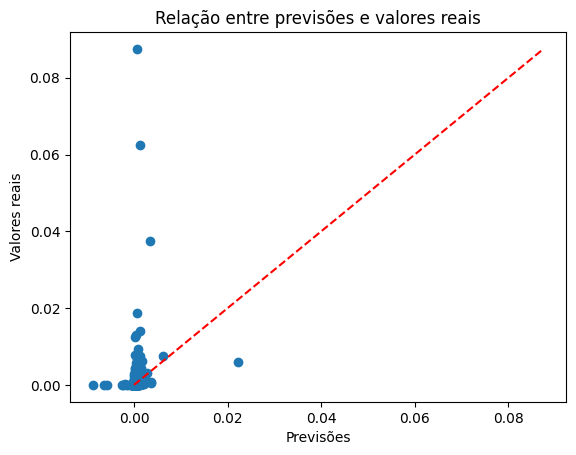

In [154]:
import matplotlib.pyplot as plt

# Visualizando a relação entre y_test e as previsões
fig, ax = plt.subplots()

ax.scatter(predictions, y_test_regressao)
ax.plot([min(y_test_regressao), max(y_test_regressao)], [min(y_test_regressao), max(y_test_regressao)], '--r')

plt.xlabel('Previsões')
plt.ylabel('Valores reais')
plt.title('Relação entre previsões e valores reais')

plt.show()

In [155]:
# Avaliando o modelo
train_score = model.score(X_train_regressao, y_train_regressao)
val_score = model.score(X_val_regressao, y_val_regressao)
test_score = model.score(X_test_regressao, y_test_regressao)

print("Score de treinamento:", train_score)
print("Score de validação:", val_score)
print("Score de teste:", test_score)

Score de treinamento: 0.002768814889942184
Score de validação: 0.0011984443974289993
Score de teste: -0.0024013548682959573


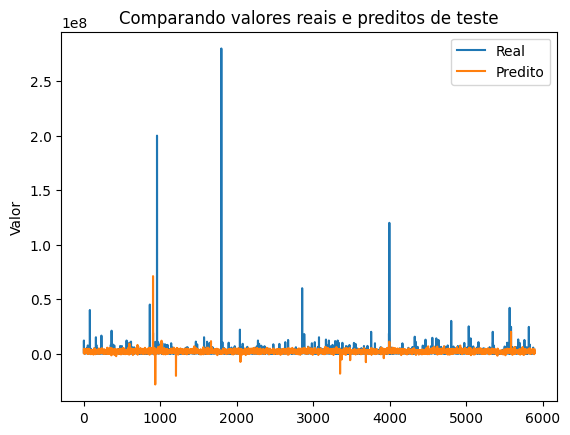

In [156]:
predict = model.predict(X_test_regressao)

# Desnormaliza o y_test na variável y_desnormalizado
y_test_regressao_desnormalizado = scaler_y_regressao.inverse_transform(y_test_regressao)

# Desnormaliza o predict na variável predict_desnormalizado
predict_desnormalizado = scaler_y_regressao.inverse_transform(predict)

#Gráfico
grafico_x = [x for x in range(1,len(y_test_regressao_desnormalizado)+1)]

plt.plot(grafico_x, y_test_regressao_desnormalizado, label='Real')
plt.plot(grafico_x, predict_desnormalizado, label='Predito')

plt.title('Comparando valores reais e preditos de teste')
plt.legend()

plt.ylabel('Valor')

plt.show()

Análise Descritiva dos dados de imóveis para a Aluguel

In [157]:
#Base Venda
df_aluguel = df[df['operacao'] == 'aluguel']

In [158]:
df_aluguel.head()

,Título,Valor,area,Valor_metro,quartos,suites,garagem,iptu,condominio,descricao,...,Salão Gourmet,Sauna,SPA,Área de Serviço Coberta,Piso em Porcelanato,Vista Livre,Home Theater,Aceita Pet,Academia,tipo
0,SCS Quadra 06 Bloco A Lote 194,7000.0,200.0,0.028571,0,0,0,5806.5,2000,"6º andar todo reformado, com 200 m², piso em p...",...,0,0,0,0,0,0,0,0,0,Prédio
1,SQNW 310 Bloco B,4900.0,76.0,0.015510,2,1,2,409,791,Excelente apartamento no condomínio Persona Ve...,...,0,1,0,0,0,0,0,0,0,Apartamento
2,COLONIA AGRICOLA SAMAMBAIA,9000.0,765.0,0.085000,5,3,21,1033.5,180.0,"Colônia Agrícola - Sobrado com 5 dormitórios, ...",...,0,1,0,0,0,0,0,0,0,Casa
3,SBS Quadra 02 Bloco S Lote 01,700.0,28.0,0.040000,0,0,0,257,562,"Excelente sala comercial com piso laminado, ar...",...,0,0,0,0,0,0,0,0,0,Sala
4,Condomínio Prive Morada Sul,7950.0,500.0,0.062893,5,3,4,1000.0,849,Sem dúvida esta é uma daquelas oportunidades q...,...,0,0,0,0,0,0,0,0,0,Casa


In [159]:
len(df_aluguel)

6748

In [160]:
df_aluguel.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6748 entries, 0 to 7308
Data columns (total 57 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Título                   6748 non-null   object 
 1   Valor                    6748 non-null   float64
 2   area                     6748 non-null   float64
 3   Valor_metro              6748 non-null   float64
 4   quartos                  6748 non-null   int64  
 5   suites                   6748 non-null   int64  
 6   garagem                  6748 non-null   int64  
 7   iptu                     6748 non-null   object 
 8   condominio               6748 non-null   object 
 9   descricao                6748 non-null   object 
 10  regiao                   6748 non-null   object 
 11  cidade                   6748 non-null   object 
 12  imobiliaria              6748 non-null   object 
 13  creci                    6748 non-null   object 
 14  operacao                

Removendo as colunas que eu considero irrelevante para o modelo

In [161]:
df_aluguel = df_aluguel.drop(columns=['Título', 'descricao', 'cidade', 'imobiliaria', 'creci', 'operacao', 'Aquecimento Solar', 'Circuito de TV', 'Gerador de Energia', 'Cobertura Coletiva', 'Guarita', 'Interfone', 'Mobiliado', 'Despensa', 'Escritório', 'Gás Canalizado', 'Jardim', 'Lavabo', 'Lazer no Pilotis',  'Poço Artesiano', 'Portão Eletrônico', 'Quadra Esportiva', 'Sala de Jogos', 'Salão de Jogos', 'Salão Gourmet', 'Sauna', 'SPA', 'Área de Serviço Coberta', 'Piso em Porcelanato', 'Vista Livre', 'Home Theater', 'Aceita Pet' ])


In [162]:
df_aluguel.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6748 entries, 0 to 7308
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Valor                  6748 non-null   float64
 1   area                   6748 non-null   float64
 2   Valor_metro            6748 non-null   float64
 3   quartos                6748 non-null   int64  
 4   suites                 6748 non-null   int64  
 5   garagem                6748 non-null   int64  
 6   iptu                   6748 non-null   object 
 7   condominio             6748 non-null   object 
 8   regiao                 6748 non-null   object 
 9   Piscina                6748 non-null   int64  
 10  Sala de Ginástica      6748 non-null   int64  
 11  Varanda                6748 non-null   int64  
 12  Cozinha Espaçosa       6748 non-null   int64  
 13  Ar Condicionado        6748 non-null   int64  
 14  PlayGround             6748 non-null   int64  
 15  Salã

In [163]:
df_aluguel['tipo'].value_counts()

Sala                 1992
Apartamento          1886
Loja                 1182
Casa                  875
Kitnet                267
Prédio                184
Galpão                143
Garagem                88
Ponto                  48
Hotel                  43
Lote/Terreno/Área      38
Rural                   2
Name: tipo, dtype: int64

In [164]:
# Configurar para exibir todas as linhas
pd.set_option('display.max_rows', None)

In [165]:
df_aluguel['regiao'].value_counts()

ASA NORTE                             1225
ASA SUL                               1172
NORTE                                  479
TAGUATINGA NORTE                       374
SUL                                    342
JARDIM BOTANICO                        300
LAGO SUL                               234
NOROESTE                               198
GUARA II                               170
SUDOESTE                               170
TAGUATINGA SUL                         154
LAGO NORTE                             133
VICENTE PIRES                          130
AREAL                                  110
GUARA I                                109
SIA                                     99
TAGUATINGA CENTRO                       95
PARK SUL                                94
SAMAMBAIA SUL                           90
SIG                                     85
NUCLEO BANDEIRANTE                      82
CEILANDIA NORTE                         66
SETOR INDUSTRIAL                        63
SAMAMBAIA N

Transformando as string em numérico

In [166]:
from sklearn.preprocessing import LabelEncoder

# Criar uma instância do LabelEncoder
label_encoder = LabelEncoder()

# Ajustar o encoder aos valores da coluna região
df_aluguel['regiao_encoded'] = label_encoder.fit_transform(df_aluguel['regiao'])

# Mapear os valores originais para os valores codificados
mapeamento = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))

# Mostrar o mapeamento
print("Mapeamento:")
for regiao, encoded_value in mapeamento.items():
    print(f"{regiao}: {encoded_value}")

Mapeamento:
ADE: 0
ALPHAVILLE BRASILIA: 1
ALTIPLANO LESTE: 2
ALTO DA BOA VISTA: 3
AREAL: 4
ARNIQUEIRA: 5
ASA NORTE: 6
ASA SUL: 7
CANDANGOLANDIA: 8
CEILANDIA CENTRO: 9
CEILANDIA NORTE: 10
CEILANDIA SUL: 11
CENTRO: 12
CHACARAS YPIRANGA: 13
COLONIA AGRICOLA SAMAMBAIA: 14
CONDOMINIO RK: 15
CONDOMÍNIO IMPÉRIO DOS NOBRES: 16
GRANDE COLORADO: 17
GRANJA DO TORTO: 18
GUARA I: 19
GUARA II: 20
IPIRANGA: 21
ITAPOA PARQUE: 22
JARDIM BOTANICO: 23
JARDINS MANGUEIRAL: 24
LAGO NORTE: 25
LAGO SUL: 26
MANSOES DE RECREIO ESTRELA DALVA: 27
NOROESTE: 28
NORTE: 29
NOVO: 30
NUCLEO BANDEIRANTE: 31
NUCLEO RURAL LAGO OESTE: 32
OCTOGONAL: 33
PARANOA: 34
PARK SUL: 35
PARK WAY: 36
PARQUE DAS AGUAS BONITAS I: 37
PARQUE DAS CACHOEIRAS: 38
PARQUE ESPLANADA I: 39
PARQUE ESPLANADA II: 40
PARQUE ESPLANADA III: 41
PARQUE MARAJO: 42
PARQUE RIO BRANCO: 43
PONTE ALTA: 44
QUADRAS ECONOMICAS LUCIO COSTA: 45
RECANTO DAS EMAS: 46
REGIAO DOS LAGOS: 47
RESIDENCIAL SANTOS DUMONT: 48
RESIDENCIAL VILLA SUICA: 49
RIACHO FUNDO: 50
RIAC

In [167]:
# Ajustar o encoder aos valores da coluna região
df_aluguel['tipo_encoded'] = label_encoder.fit_transform(df_aluguel['tipo'])

# Mapear os valores originais para os valores codificados
mapeamento = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))

# Mostrar o mapeamento
print("Mapeamento:")
for tipo, encoded_value in mapeamento.items():
    print(f"{tipo}: {encoded_value}")

Mapeamento:
Apartamento: 0
Casa: 1
Galpão: 2
Garagem: 3
Hotel: 4
Kitnet: 5
Loja: 6
Lote/Terreno/Área: 7
Ponto: 8
Prédio: 9
Rural: 10
Sala: 11


Separar o X e o y, Normalizando os dados, e separar os dados em treinamento, teste e validação

In [168]:
df_aluguel = df_aluguel.drop(columns=['regiao', 'tipo'])

In [169]:
# Separar X e y
X_regressao = df_aluguel.drop('Valor', axis = 1)
y_regressao = df_aluguel[['Valor']]

# Separar X e y em treinamento (70%), validação (15%) e teste (15%)
X_train_regressao, X_temp, y_train_regressao, y_temp = train_test_split(X_regressao, y_regressao, test_size=0.3, random_state=42)
X_val_regressao, X_test_regressao, y_val_regressao, y_test_regressao = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Normalizar X e y
scaler_X_regressao = MinMaxScaler()
X_regressao = scaler_X_regressao.fit_transform(X_regressao)


X_train_regressao = scaler_X_regressao.transform(X_train_regressao)
X_val_regressao = scaler_X_regressao.transform(X_val_regressao)
X_test_regressao = scaler_X_regressao.transform(X_test_regressao)


scaler_y_regressao = MinMaxScaler()
y_regressao = scaler_y_regressao.fit_transform(y_regressao)


y_train_regressao = scaler_y_regressao.transform(y_train_regressao)
y_val_regressao = scaler_y_regressao.transform(y_val_regressao)
y_test_regressao = scaler_y_regressao.transform(y_test_regressao)


# Exibe as 5 primeiro linhas do df_aluguel
df_aluguel.head()

,Valor,area,Valor_metro,quartos,suites,garagem,iptu,condominio,Piscina,Sala de Ginástica,...,Projeto de Iluminação,Pintura Nova,Área de Lazer,Área de Serviço,Brinquedoteca,Churrasqueira,Cozinha com Armários,Academia,regiao_encoded,tipo_encoded
0,7000.0,200.0,0.028571,0,0,0,5806.5,2000,0,0,...,0,0,0,0,0,0,0,0,7,9
1,4900.0,76.0,0.015510,2,1,2,409,791,1,0,...,0,0,0,0,0,0,0,0,28,0
2,9000.0,765.0,0.085000,5,3,21,1033.5,180.0,1,0,...,0,0,0,0,0,0,0,0,14,1
3,700.0,28.0,0.040000,0,0,0,257,562,0,0,...,0,0,0,0,0,0,0,0,7,11
4,7950.0,500.0,0.062893,5,3,4,1000.0,849,0,0,...,0,0,0,0,0,0,0,0,23,1


Criar modelo e Treinar o modelo

In [170]:
# Criando e treinando o modelo de regressão linear múltipla
model = LinearRegression()
model.fit(X_regressao, y_regressao)

LinearRegression()

In [171]:
# Coeficientes (parâmetros) do modelo
print("Coeficientes:", model.coef_)

Coeficientes: [[ 2.11885419e-01 -7.60525807e-02  5.81445121e-03 -3.89717918e-03
   9.07032888e-02  1.65862817e-02  2.54312677e-02 -6.41669182e-04
  -4.72929992e-05  1.14465729e-03  2.95407958e-03 -1.75291936e-05
  -1.18137003e-03  2.26339277e-03 -1.71282214e-03 -7.43787386e-04
  -6.96988024e-04 -4.38367614e-04 -1.38777878e-17 -8.67361738e-19
  -4.93298680e-04  0.00000000e+00 -1.69176571e-03  5.48192121e-04]]


In [172]:
# Intercepto do modelo
print("Intercepto:", model.intercept_)

Intercepto: [0.00062929]


Metricas e Avaliação do Modelo

In [173]:
#Avaliando previsões e erro
predictions = model.predict(X_test_regressao)
print("Previsões:", predictions)

print(mean_absolute_error(y_test_regressao, predictions))
print(mean_squared_error(y_test_regressao, predictions))

Previsões: [[0.00614864]
 [0.00173803]
 [0.00158913]
 ...
 [0.00189849]
 [0.00297796]
 [0.00426011]]
0.002088851926187125
7.895042582763591e-05


In [174]:
from sklearn.metrics import r2_score

r2 = r2_score(y_test_regressao, predictions)
print(r2)

0.6005267561286245


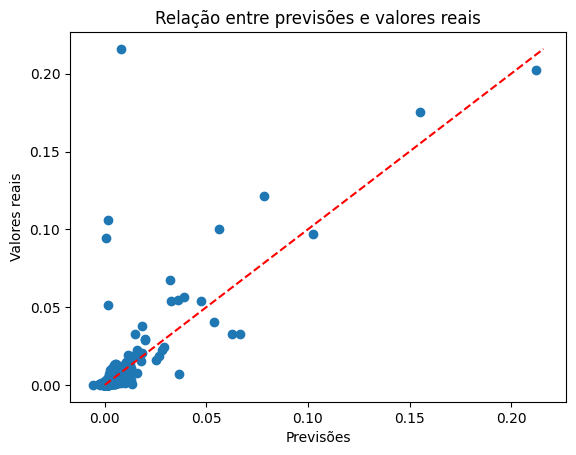

In [175]:
# Visualizando a relação entre y_test e as previsões
fig, ax = plt.subplots()

ax.scatter(predictions, y_test_regressao)
ax.plot([min(y_test_regressao), max(y_test_regressao)], [min(y_test_regressao), max(y_test_regressao)], '--r')

plt.xlabel('Previsões')
plt.ylabel('Valores reais')
plt.title('Relação entre previsões e valores reais')

plt.show()


In [176]:
# Avaliando o modelo
train_score = model.score(X_train_regressao, y_train_regressao)
val_score = model.score(X_val_regressao, y_val_regressao)
test_score = model.score(X_test_regressao, y_test_regressao)

print("Score de treinamento:", train_score)
print("Score de validação:", val_score)
print("Score de teste:", test_score)

Score de treinamento: 0.2948021691811078
Score de validação: 0.6553569809325698
Score de teste: 0.6005267561286245


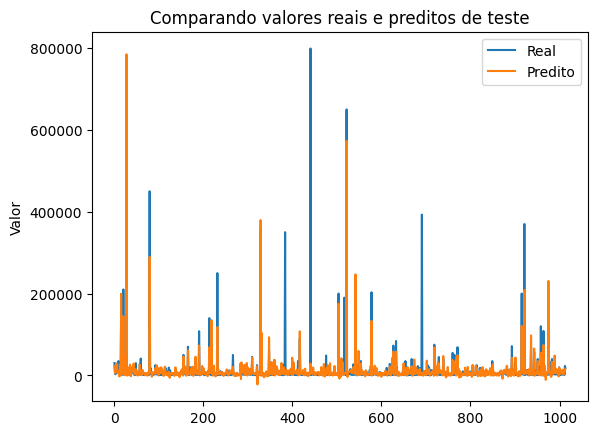

In [177]:
predict = model.predict(X_test_regressao)

# Desnormaliza o y_test na variável y_desnormalizado
y_test_regressao_desnormalizado = scaler_y_regressao.inverse_transform(y_test_regressao)

# Desnormaliza o predict na variável predict_desnormalizado
predict_desnormalizado = scaler_y_regressao.inverse_transform(predict)

#Gráfico
grafico_x = [x for x in range(1,len(y_test_regressao_desnormalizado)+1)]

plt.plot(grafico_x, y_test_regressao_desnormalizado, label='Real')
plt.plot(grafico_x, predict_desnormalizado, label='Predito')

plt.title('Comparando valores reais e preditos de teste')
plt.legend()

plt.ylabel('Valor')

plt.show()